In [ ]:
# Import the libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
import plotly.express as px

# NLTK: Natural Language tool kit
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS

# Gensim is an open-source library for unsupervised topic modeling and natural language processing
import gensim 
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# Tensorflow 
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [ ]:
# Mount the google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the stock news data
stock_df = pd.read_csv("/content/drive/My Drive/Datasets/Stock Sentiment.csv")

In [ ]:
# Let's view the dataset 
stock_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [ ]:
# Info of the dataset
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [ ]:
# Check for null values
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [ ]:
# Get the unique elements for the sentiment column
stock_df["Sentiment"].value_counts()

1    3685
0    2106
Name: Sentiment, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



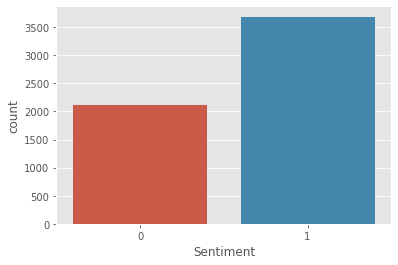

In [ ]:
# Plot the unique elements for the sentiment column
sns.countplot(stock_df["Sentiment"])

In [ ]:
# PERFORM DATA CLEANING (REMOVE PUNCTUATIONS FROM TEXT)
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# An example for punctuation removal
Test = "$I love AI & Machine learning!!"
Test_punc_removed = [char for char in Test if char not in string.punctuation]

# Another method:
# Test_punc_removed = []
# for char in Test:
#     if char not in string.punctuation:
#         Test_punc_removed.append(char)

Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

# Another example
Test = "Good morning beautiful people :)... #I am having fun learning Finance with Python!!"
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed_join = "".join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Finance with Python'

In [ ]:
# Let's create a function to remove punctuations
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = "".join(Test_punc_removed)

    return Test_punc_removed_join

In [ ]:
# Let's remove punctuations from our dataset 
stock_df["Text Without Punctuation"] = stock_df["Text"].apply(remove_punc)

In [ ]:
# Let's view the new dataset 
stock_df

,Text,Sentiment,Text Without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


In [ ]:
# PERFORM DATA CLEANING (REMOVE STOPWORDS)
# Download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Check the stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'will', 'aap', 'co', 'day', 'user', 'stock', 'today', 'week', 'year', 'https'])

In [ ]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

In [ ]:
# Applying pre-processing to the Text Without Punctuation column
stock_df["Text Without Punc & Stopwords"] = stock_df["Text Without Punctuation"].apply(preprocess)

In [ ]:
# Let's view the new dataset 
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


In [ ]:
# PLOT WORDCLOUD
# Join the words into a string
stock_df["Text Without Punc & Stopwords Joined"] = stock_df["Text Without Punc & Stopwords"].apply(lambda x: " ".join(x))

In [ ]:
# Let's view the new dataset 
stock_df

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


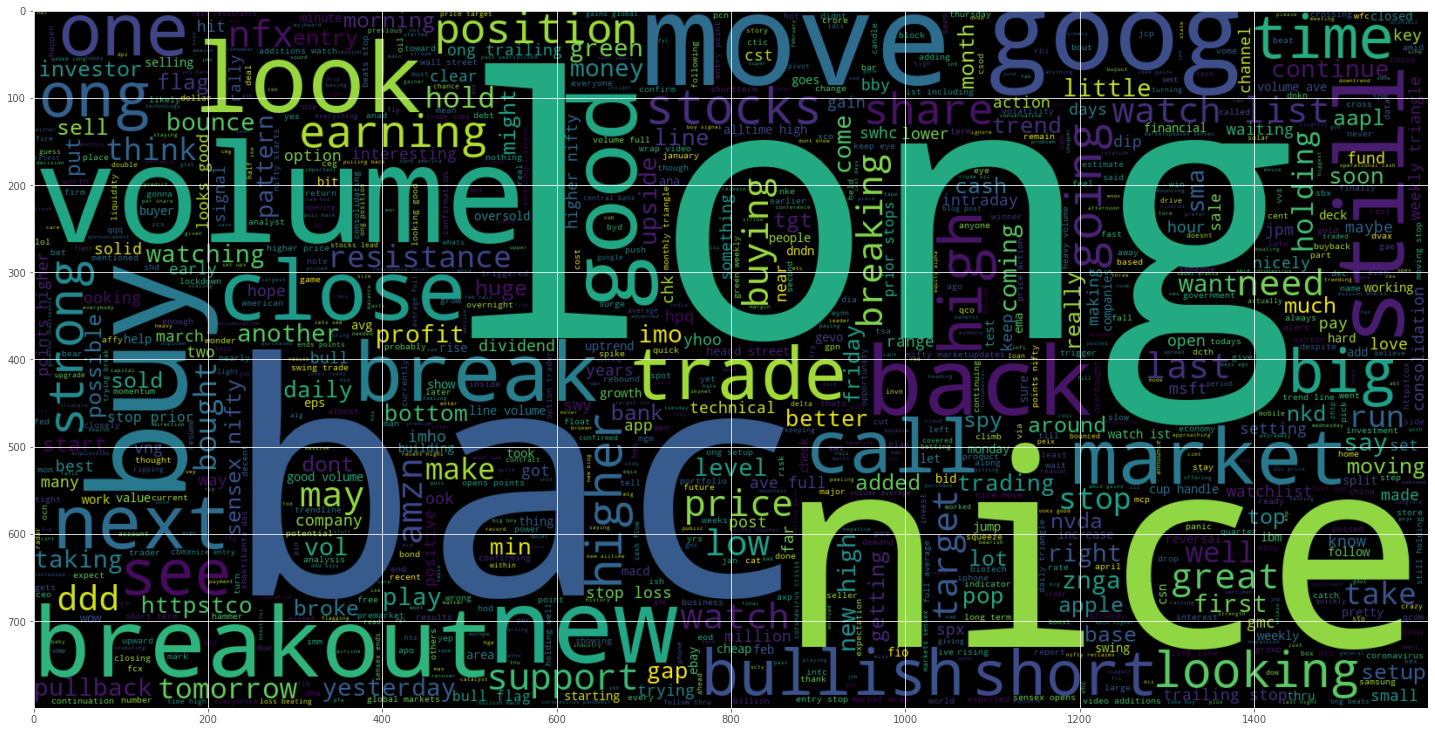

In [ ]:
# Plot the word cloud for text with Positive Sentiment
plt.figure(figsize = (25, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df["Sentiment"] == 1]["Text Without Punc & Stopwords Joined"]))
plt.imshow(wc, interpolation = "bilinear")

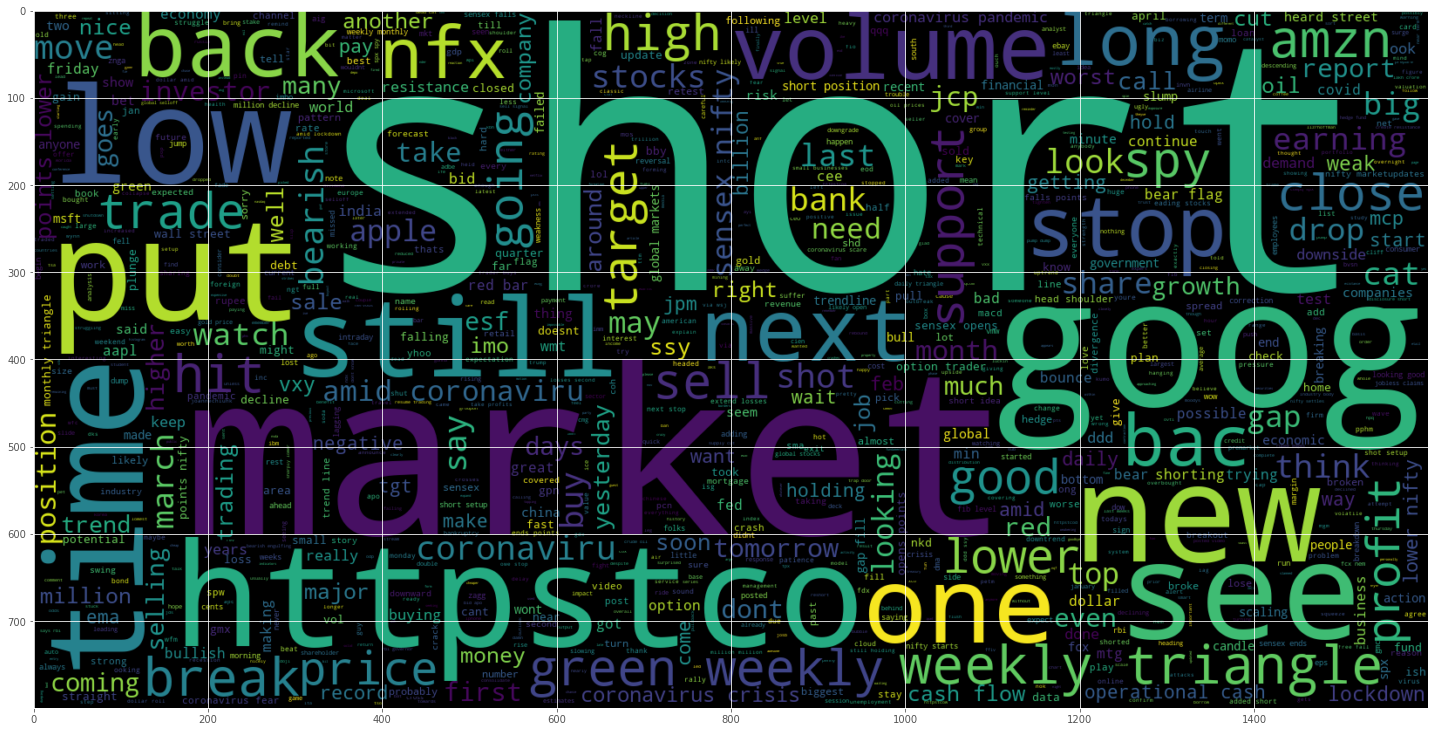

In [ ]:
# Plot the word cloud for text with Negative Sentiment
plt.figure(figsize = (25, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df["Sentiment"] == 0]["Text Without Punc & Stopwords Joined"]))
plt.imshow(wc, interpolation = "bilinear")

In [ ]:
# VISUALIZE CLEANED DATASETS
# Download punkt
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Word Tokenization is used to break up a string into words
print(stock_df["Text Without Punc & Stopwords Joined"][0])
print(nltk.word_tokenize(stock_df["Text Without Punc & Stopwords Joined"][0]))

kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts']


In [ ]:
# Obtain the maximum length of data in the document. This will be used later when word embeddings are generated
maxlen = -1
for doc in stock_df["Text Without Punc & Stopwords Joined"]:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is:", maxlen)

The maximum number of words in any document is: 20


In [ ]:
# Get the length of each tweet
tweets_length = [len(nltk.word_tokenize(x)) for x in stock_df["Text Without Punc & Stopwords Joined"]]
tweets_length

[14,
 6,
 7,
 1,
 0,
 1,
 8,
 13,
 8,
 4,
 10,
 18,
 8,
 8,
 11,
 5,
 12,
 10,
 12,
 4,
 6,
 5,
 2,
 5,
 3,
 10,
 3,
 3,
 9,
 6,
 8,
 10,
 8,
 3,
 10,
 11,
 4,
 8,
 11,
 10,
 10,
 7,
 9,
 8,
 4,
 10,
 8,
 7,
 7,
 9,
 10,
 10,
 8,
 2,
 14,
 12,
 9,
 8,
 1,
 14,
 7,
 11,
 5,
 13,
 6,
 6,
 7,
 6,
 6,
 10,
 9,
 4,
 10,
 13,
 16,
 6,
 9,
 6,
 2,
 11,
 5,
 4,
 9,
 11,
 16,
 4,
 9,
 5,
 6,
 2,
 1,
 5,
 9,
 4,
 7,
 6,
 7,
 10,
 1,
 3,
 9,
 4,
 16,
 8,
 10,
 11,
 18,
 6,
 7,
 13,
 12,
 9,
 3,
 3,
 10,
 10,
 8,
 6,
 8,
 5,
 5,
 8,
 9,
 15,
 3,
 5,
 9,
 18,
 13,
 11,
 3,
 1,
 1,
 2,
 7,
 12,
 12,
 8,
 8,
 10,
 9,
 10,
 15,
 8,
 9,
 9,
 12,
 10,
 6,
 10,
 13,
 4,
 11,
 8,
 15,
 13,
 8,
 12,
 5,
 5,
 3,
 7,
 2,
 4,
 10,
 5,
 6,
 10,
 6,
 16,
 9,
 6,
 5,
 10,
 9,
 10,
 8,
 2,
 10,
 9,
 10,
 12,
 7,
 10,
 7,
 3,
 6,
 5,
 9,
 9,
 4,
 6,
 5,
 4,
 4,
 8,
 10,
 8,
 8,
 13,
 9,
 7,
 10,
 12,
 8,
 6,
 5,
 3,
 10,
 11,
 6,
 9,
 10,
 13,
 10,
 7,
 12,
 7,
 11,
 10,
 4,
 4,
 3,
 10,
 2,
 9,
 10,
 15,
 12,
 10

In [ ]:
# Plot the distribution for the number of words in a text
fig = px.histogram(x = tweets_length, nbins = 50)
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



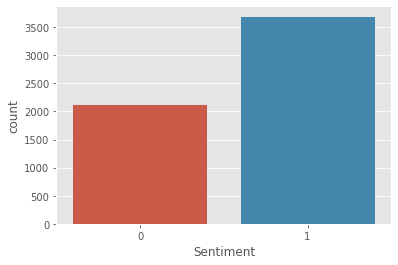

In [ ]:
# Visually indicate how many samples belong to the Positive and Negative Sentiments class
sns.countplot(stock_df["Sentiment"])

In [ ]:
# PREPARE THE DATA BY TOKENIZING AND PADDING

# Obtain the total words present in the dataset
list_of_words = []
for i in stock_df["Text Without Punc & Stopwords"]:
    for j in i:
        list_of_words.append(j)

In [ ]:
# Show all the words
list_of_words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'awesome',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'ebooks',
 'mnta',
 'pgnx',
 'current',
 'downtrend',
 'break',
 'otherwise',
 'shortterm',
 'correction',
 'medterm',
 'downtrend',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'still',
 'much',
 'like',
 'setup',
 'really',
 'worries',
 'everyone',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'every',
 'time',
 'shall',
 'see',
 'soon',
 'bac',
 'spx',
 'jpm',
 'gamcos',
 'arry',
 'haverty',
 'apple',
 'extremely',
 'chea

In [ ]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

9268

In [ ]:
# Spliting the data into train and test set
X = stock_df["Text Without Punc & Stopwords"]
y = stock_df["Sentiment"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
# Shape of the train and test dataset
print(X_train.shape)
print(X_test.shape)

(5211,)
(580,)


In [ ]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Check the sequences
train_sequences
# test_sequences

[[23, 26, 1290, 1875, 958, 3595, 1876, 82, 459, 180, 242, 44, 3596],
 [38, 1291, 3597],
 [10, 15, 8],
 [72, 1105, 172, 255, 460],
 [6, 1106, 1106, 3598, 29, 359, 3599, 6, 484, 123, 297, 854],
 [959, 77, 855, 298],
 [549, 12, 243, 204, 37, 2, 81, 856],
 [222, 3600, 11, 14, 56, 1292, 136, 32, 49],
 [637, 1293],
 [694, 1294, 1877, 36, 1878, 51, 695, 3601, 857, 3, 335],
 [116, 226],
 [261, 31, 39, 959],
 [858, 90, 105, 3602, 146],
 [859, 287, 336, 1, 1879, 770],
 [232, 117, 3603, 510, 3604, 4, 189, 3605, 3606, 3607],
 [299, 1880, 1107, 106],
 [226, 696, 52, 223, 209],
 [10, 380, 1881, 424],
 [2446, 3608],
 [118, 300, 36, 13, 2447, 87, 64, 85],
 [137, 60, 262, 263, 2, 960, 205, 18, 697],
 [402, 550, 3609, 3610, 2448, 511, 3611, 55, 161, 181, 402],
 [961, 32, 3612, 512, 1523],
 [31, 25, 3613, 99],
 [1524, 1, 337, 8],
 [10, 1882, 380, 3614, 3615, 3616, 39],
 [1295, 49],
 [1108, 78, 63],
 [2449, 21, 124, 2450, 1525, 3617, 2451, 3618, 79, 3619, 3620, 3621, 3622],
 [1109, 1526, 485, 74, 1883, 24

In [ ]:
# Look at the encoding of a single column
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 4075    [target, rip, tits]
Name: Text Without Punc & Stopwords, dtype: object 
 is:  [38, 1291, 3597]


In [ ]:
# Add padding to training and testing dataset
padded_train = pad_sequences(train_sequences, maxlen = 29) # , padding = "post", truncating = "post"
padded_test = pad_sequences(test_sequences, maxlen = 29) # , truncating = "post"

In [ ]:
# Print first 3 padded data with encoding
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i + 1, " is:", doc)

The padded encoding for document: 1  is: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0   23   26 1290 1875  958 3595 1876   82  459  180  242   44
 3596]
The padded encoding for document: 2  is: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0   38 1291
 3597]
The padded encoding for document: 3  is: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 10 15  8]


In [ ]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [ ]:
# Shape of the y_train_cat and y_test_cat
print(y_train_cat.shape)
print(y_test_cat.shape)

(5211, 2)
(580, 2)


In [ ]:
# Print the 2D representation
print(y_train_cat)
print(y_test_cat)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
# BUILD A CUSTOM-BASED DEEP NEURAL NETWORK TO PERFORM SENTIMENT ANALYSIS

# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation = "softmax"))

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["acc"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         4745216   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 5,565,826
Trainable params: 5,565,826
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 2)

Epoch 1/2
131/131 [==============================] - 8s 61ms/step - loss: 0.5578 - acc: 0.7061 - val_loss: 0.4795 - val_acc: 0.7555
Epoch 2/2
131/131 [==============================] - 8s 58ms/step - loss: 0.2668 - acc: 0.8896 - val_loss: 0.5939 - val_acc: 0.7584


In [ ]:
# Make prediction
pred = model.predict(padded_test)

# Argmax finds the argument that gives the maximum value and used to find the class with the highest probability
prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [ ]:
# list containing original values
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [ ]:
# Accuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.7620689655172413

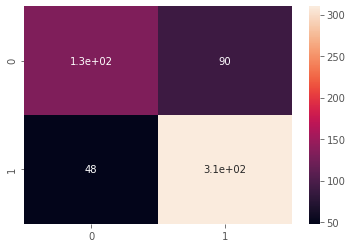

In [ ]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)